In [1]:
import numpy as np
import pandas as pd
import os
import datetime
import warnings
import time
# 遍历所有文件

warnings.filterwarnings('ignore') 
CURRENT_DATE = pd.to_datetime(datetime.date.today())
from tool import *

In [8]:


patt = '白鹭郡|百汇|梅溪郡|滨江|缇香|紫台'

com_old = re.compile(patt)


com_old.match("白鹭郡")

<_sre.SRE_Match object; span=(0, 3), match='白鹭郡'>

In [2]:


path = r"C:\Users\vkad\Desktop\签约明细表"
save_dir = r'C:\Users\vkad\Desktop\result'

In [3]:
while True:
    print('如果直接回车日期为当日')
    in_today = input('请输入日期->').strip()
    if in_today:
        try:
            today = pd.to_datetime(in_today)
            break
        except:
            print('请输入正确的日期格式:')
    else:
        today = CURRENT_DATE
        break

如果直接回车日期为当日
请输入日期->


In [5]:

index_l = ['白鹭郡','百汇','梅溪郡','滨江',  '缇香','紫台']

In [15]:
"房间ID" in df_ssmx.columns

True

In [2]:
format_date = '%Y-%m-%d %H_%M_%S'
com_patt = r'^财务楼盘表(?P<date>20\d{2}-\d{2}-\d{2} \d{2}_\d{2}_\d{2})\.xlsx$'
cwlp_dir = r"C:\Users\vkad\Desktop\财务楼盘"
indexlp_l = ['长沙白鹭郡','长沙金域国际','长沙梅溪郡', '长沙金域滨江',  '长沙金域缇香',  '长沙紫台']

indexmx_l = ['白鹭郡','百汇','梅溪郡','滨江',  '缇香','紫台']

xm_lp_map_mx = dict(zip(indexlp_l,indexmx_l))


# df_lp = read_lp(cwlp_dir,xm_lp_map_mx)
# df_ssmx = read_ssmx(cwlp_dir,xm_lp_map_mx)

In [3]:
df_mx1 = read_mx(path)

读取XX商业签约明细
合并XX商业签约明细
读取XX签约明细
合并XX签约明细
读取XX车位明细
合并XX车位明细

读取白鹭郡商业签约明细
合并白鹭郡商业签约明细
读取白鹭郡签约明细
合并白鹭郡签约明细
读取白鹭郡车位明细
合并白鹭郡车位明细

明细表读取完毕


In [5]:
df_mx1['类型'].unique()

array(['商业', '住宅', '车位'], dtype=object)

In [4]:
df_mx1['项目'].unique()

array(['XX', '白鹭郡', 'XXX'], dtype=object)

In [3]:
def read_search_lp(cwlp_dir,xm_lp_map_mx):
    df_lp = read_lp(cwlp_dir,xm_lp_map_mx)
    
    lp_l_r = ['房间编码','楼盘_合并房号','项目名称','分期名称','客户名称','业务员','产品类型','建筑预测面积','成交总价','实收','欠款','装修款','认购日期','转签约日期','销售状态','楼栋','房号']
    df_lp_r = df_lp[lp_l_r]
    df_lp_r['实收'] = df_lp_r['实收'].astype(int)
    df_lp_r['毛坯总价'] = df_lp_r['成交总价'] - df_lp_r['装修款']


    return df_lp_r

def serach_data(df_lp_r):
    lp_l_r1 = ['房间编码','楼盘_合并房号','项目名称','客户名称','业务员','产品类型','建筑预测面积','成交总价','毛坯总价','装修款','实收','欠款','认购日期','转签约日期','销售状态']
    df_lp_r1 = df_lp_r[lp_l_r1]
    df_lp_r1.rename(columns={"楼盘_合并房号":"合并房号","项目类型":"项目",'建筑预测面积':"面积"},inplace=True)


    data = df_lp_r1
    data['认购日期'] = data['认购日期'].dt.floor("d").astype(str)
    data['转签约日期'] = data['转签约日期'].dt.floor("d").astype(str)
    return data

def save_map(df_lp_r,save_dir):
    fields = ['房间编码','销售状态','楼盘_合并房号','项目名称','分期名称','客户名称',
              '业务员','产品类型','建筑预测面积','成交总价','实收','欠款','装修款','毛坯总价',
              '认购日期','楼栋','房号']


   
    data = df_lp_r[fields]

    data = data[data['销售状态'] == "认购"]
    del data['销售状态']
    data.rename(columns={'业务员':"置业顾问",
            "楼盘_合并房号":"合并房号","建筑预测面积":"建筑面积","客户名称":"姓名","装修款":"装修总价","成交总价":"买卖合同总价",
                        "实收":"首付金额","欠款":"贷款金额",'产品类型':'类型'
                        },inplace=True)
    
    for pro_name in data['项目名称'].unique():
        data_pro = data[data["项目名称"]==pro_name]
        writer = pd.ExcelWriter(save_dir + r"\%s_data.xlsx" %pro_name)
        data_pro.to_excel(writer,sheet_name="data",index=False)

        writer.save()

In [4]:
patt_l = []
#匹配合并房号
room_patt = r"^(?P<room>[A-Z]?\d+-S?\d+|[A-Z]?\d{1,4})$"
com_room = re.compile(room_patt)
patt_l.append(room_patt)
# 房间ID 匹配
roomcode_patt = r"^(?P<room_code>P\d{4}-\d{2}-[A-Z]\d{4}-\w{1,4}--?\d{1,3}-.{1,15}\d)$"
com_roomcode = re.compile(roomcode_patt)
patt_l.append(roomcode_patt)

# 姓名匹配
name_patt = r"^(?P<user_name>[\u4E00-\u9FA5]{2,4})$"
com_name = re.compile(name_patt)
patt_l.append(name_patt)

# 切换项目
sw_pro_patt = "^go\s+(?P<switch_pro>\S{1,5})$"
com_sw_pro = re.compile(sw_pro_patt)



patt_s = '|'.join(patt_l)

com_match = re.compile(patt_s)

In [5]:
# 匹配 room
def search_room(data,room):
    data = data[data['合并房号'] == room]

    return data
# 匹配 roomcode
def search_roomcode(data,roomcode):
    data = data[data['房间编码'] == roomcode]

    return data
# 匹配username
def search_name(data,user_name):
    data = data[data['客户名称'].astype(str).str.contains(user_name)]

    return data

def switch_pro(data,pro_name):
    data_r = serach_data(df_lp_r)
    if pro_name == "all":
        print('OK')
        return data_r
    if pro_name in data_r['项目名称'].unique():
        print('OK')
        return data_r[data_r['项目名称'] == pro_name]
    print('请确认为以下项目',','.join(data_r['项目名称'].unique()))

    return data

In [6]:
search_d = {
    "room":search_room,
    "room_code":search_roomcode,
    "user_name":search_name,

}

In [7]:
cwlp_dir = r"C:\Users\Administrator\Desktop\财务楼盘"
indexlp_l = ['长沙白鹭郡','长沙金域国际','长沙梅溪郡', '长沙金域滨江',  '长沙金域缇香',  '长沙紫台']

indexmx_l = ['白鹭郡','百汇','梅溪郡','滨江',  '缇香','紫台']

xm_lp_map_mx = dict(zip(indexlp_l,indexmx_l))

save_dir = r"C:\Users\Administrator\Desktop\data"
pro_name = 'all'

In [8]:
df_lp_r = read_search_lp(cwlp_dir,xm_lp_map_mx)
data = serach_data(df_lp_r)
save_map(df_lp_r,save_dir)


读取最新财务楼盘表
C:\Users\Administrator\Desktop\财务楼盘\财务楼盘表2019-04-04 15_25_54.xlsx
耗时31.50秒


In [ ]:
while True:
    cmd_s = input('请输入>>').strip()
    if cmd_s == 'q':
        break
    if cmd_s == 'save':
        save_map(df_lp_r,save_dir)
        continue
    if cmd_s == 'reload':
        df_lp_r = read_search_lp(cwlp_dir,xm_lp_map_mx)
        data = serach_data(df_lp_r)
        continue
    if cmd_s == 'update':
        df_lp_temp = read_search_lp(cwlp_dir + r"\update",xm_lp_map_mx)
        
        data_s = set(df_lp_r['房间编码']) - set(df_lp_temp['房间编码'])

        data_lp_r = df_lp_r[df_lp_r['房间编码'].isin(data_s)]
        data_lp_r = pd.concat([df_lp_r,df_lp_temp]).reset_index(drop=True)

        save_map(df_lp_r,save_dir)
        data = serach_data(df_lp_r)
        data = switch_pro(data,pro_name)

        continue
    mat = com_sw_pro.match(cmd_s)
    
    if mat:
        pro_name = mat.groupdict()["switch_pro"]
        data = switch_pro(data,pro_name)
        continue
        
    mat = com_match.match(cmd_s)
    if mat:
           for k,v in mat.groupdict().items():
                if v:
                    data1 = search_d[k](data,v)
    
                    if len(data1) > 1:
                        data1 = data1[['房间编码','项目名称','产品类型','合并房号','客户名称']].set_index(['房间编码','项目名称','产品类型','合并房号'])
                        
                    else :
                        data1 = data1.set_index('房间编码').T

    else:
        print('请确认输入的内容')
        continue
    print(data1)

['房间编码',
 '合并房号',
 '项目名称',
 '客户名称',
 '业务员',
 '产品类型',
 '面积',
 '成交总价',
 '毛坯总价',
 '装修款',
 '实收',
 '欠款',
 '认购日期',
 '转签约日期',
 '销售状态']

In [32]:
print(data1.set_index(['房间编码','项目名称','产品类型','合并房号']))

                                         客户名称
房间编码                     项目名称 产品类型 合并房号      
P0784-01-B0001-1-1-1-101 百汇   商业   1-101  颜香桃
P0645-01-B0032-1-1-1-101 白鹭郡  商业   1-101   倪特


In [30]:
print(data1)


                       房间编码 项目名称 产品类型   合并房号 客户名称
0  P0784-01-B0001-1-1-1-101   百汇   商业  1-101  颜香桃
1  P0645-01-B0032-1-1-1-101  白鹭郡   商业  1-101   倪特


In [ ]:
df_lp['项目名称'.]

In [68]:
df_lp['销售状态'].unique()

array(['签约', '认购', '销控', '待售', '非售'], dtype=object)

In [29]:


data


,房间编码,合并房号,项目名称,姓名,置业顾问,类型,建筑面积,买卖合同总价,首付金额,贷款金额,装修总价,毛坯总价,认购日期,楼栋,房号
6258,P0305-04-B0003-A-1-0001-101,10-101,紫台,刘瑞连,朱立军,住宅,193.50,3899084,3899084.0,0.0,684185,3214899,2018-11-18,10,101
6259,P0305-04-B0003-A-1-0002-102,10-102,紫台,陈治州,刘楠,住宅,177.38,3541450,3541450.0,0.0,633587,2907863,2019-03-02,10,102
6260,P0305-04-B0003-A-1-0003-103,10-103,紫台,唐福,贺鑫宇,住宅,184.75,2888081,2888081.0,0.0,0,2888081,2018-11-18,10,103
6261,P0305-04-B0003-A-1-0004-104,10-104,紫台,徐萌艺,张丹,住宅,179.54,2890122,2890122.0,0.0,0,2890122,2018-11-18,10,104
6262,P0305-04-B0003-A-2-0001-201,10-201,紫台,张境容,张丹,住宅,188.45,3550000,3550000.0,0.0,679928,2870072,2019-01-27,10,201
6263,P0305-04-B0003-A-2-0002-202,10-202,紫台,朱新义,王瑶,住宅,188.45,3676094,100000.0,3576094.0,679927,2996167,2019-04-05,10,202
6264,P0305-04-B0003-A-2-0003-203,10-203,紫台,朱利明,王瑶,住宅,182.32,3594803,100000.0,3494803.0,657810,2936993,2019-04-05,10,203
6265,P0305-04-B0003-A-2-0004-204,10-204,紫台,李旭,王瑶,住宅,187.59,3754581,1314581.0,2440000.0,670056,3084525,2019-02-18,10,204
6266,P0305-04-B0003-A-3-0001-301,10-301,紫台,邓宇扬,王冰倩,住宅,188.45,3513771,3513771.0,0.0,625533,2888238,2018-11-19,10,301
6267,P0305-04-B0003-A-3-0002-302,10-302,紫台,刘新玉,张丹,住宅,188.45,3725091,1685091.0,2040000.0,679927,3045164,2019-04-09,10,302


In [ ]:
['房间编码','合并房号',]

In [ ]:
data = df_lp_r[df_lp_r['项目名称'] == "紫台"]

In [13]:
data = df_lp_r[df_lp_r['项目名称'] == "紫台"]
data = data[data['客户名称'].astype(str).str.contains("刘瑞连")]
data['认购日期'] = data['认购日期'].dt.floor("d").astype(str)
data['转签约日期'] = data['转签约日期'].dt.floor("d").astype(str)
data.T

,6258
房间编码,P0305-04-B0003-A-1-0001-101
合并房号,10-101
项目名称,紫台
客户名称,刘瑞连
业务员,朱立军
产品类型,住宅
面积,193.5
成交总价,3899084
毛坯总价,3214899
装修款,684185


In [42]:
writer = pd.ExcelWriter(r"C:\Users\vkad\Desktop\t.xlsx")
data.T.to_excel(writer,sheet_name="serach_data",index=True)
writer.save()

In [ ]:
xxx

如果直接回车日期为当日
请输入日期->


读取梅溪郡商业签约明细
合并梅溪郡商业签约明细
读取梅溪郡签约明细
合并梅溪郡签约明细
读取梅溪郡车位明细
合并梅溪郡车位明细

读取滨江商业签约明细
->无滨江商业签约明细表
读取滨江签约明细
合并滨江签约明细
读取滨江车位明细
合并滨江车位明细

读取白鹭郡商业签约明细
合并白鹭郡商业签约明细
读取白鹭郡签约明细
合并白鹭郡签约明细
读取白鹭郡车位明细
合并白鹭郡车位明细

读取百汇商业签约明细
合并百汇商业签约明细
读取百汇签约明细
合并百汇签约明细
读取百汇车位明细
合并百汇车位明细

读取紫台商业签约明细
合并紫台商业签约明细
读取紫台签约明细
合并紫台签约明细
读取紫台车位明细
合并紫台车位明细

读取缇香商业签约明细
合并缇香商业签约明细
读取缇香签约明细
合并缇香签约明细
读取缇香车位明细
合并缇香车位明细

明细表读取完毕


In [26]:
 df_mx[['网签签字日期','网签日期', '客户契税/维修基金']]

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
5       NaT
6       NaT
7       NaT
8       NaT
9       NaT
10      NaT
11      NaT
12      NaT
13      NaT
14      NaT
15      NaT
16      NaT
17      NaT
18      NaT
19      NaT
20      NaT
21      NaT
22      NaT
23      NaT
24      NaT
25      NaT
26      NaT
27      NaT
28      NaT
29      NaT
         ..
16908   NaT
16909   NaT
16910   NaT
16911   NaT
16912   NaT
16913   NaT
16914   NaT
16915   NaT
16916   NaT
16917   NaT
16918   NaT
16919   NaT
16920   NaT
16921   NaT
16922   NaT
16923   NaT
16924   NaT
16925   NaT
16926   NaT
16927   NaT
16928   NaT
16929   NaT
16930   NaT
16931   NaT
16932   NaT
16933   NaT
16934   NaT
16935   NaT
16936   NaT
16937   NaT
Length: 16938, dtype: datetime64[ns]

读取最新楼盘报表
C:\Users\vkad\Desktop\财务楼盘\财务楼盘表2019-04-14 15_14_45.xlsx
耗时31.14秒


In [ ]:
patt = r"^S?\d+-S?\d+$"
# 房间ID 匹配
roomcod_patt = r"(^P\d{4}-\d{2}-[A-Z]\d{4}-\w{1,4}--?\d{1,3}-.{1,15}\d$)"
com_roomcode = re.compile(roomcod_patt)
com_roomcode.match("P5109-01-B0028-2-9-1-1001")
# 姓名匹配
patt = r"[\u4E00-\u9FA5]{2,4}"
com_name = re.compile(patt)
com_name.match("马敏伟")
df_lp_r[df_lp_r['客户名称'].astype(str).str.contains("马敏伟")]

In [6]:
df_lp.columns

Index(['房间ID', '项目名称', '分期名称', '产品类型全称', '主数据楼栋名称', '营销楼栋名称', '单元', '房号', '户型',
       '建筑预测面积', '套内预测面积', '建筑实测面积', '套内实测面积', '经营属性', '经营状态', '销售状态', '客户名称',
       '认购时间', '转签约日期', '合同编号', '结算日期', '约定\计划交付日期', '按揭约定放款日期', '公积金约定放款日期',
       '付款方式名称', '购房形式名称', '标准总价', '标准总价税额(元)', '不含税标准总价(元)', '最终折扣（%）',
       '折扣说明', '成交总价', '最新成交总价（含装修款）', '最新成交总价(含税)(元)', '最新成交总价(税额)(元)',
       '最新成交总价(不含税)(元)', '税率', '面积差金额', '合同币种', '实收非贷款类房款', '实收贷款类房款', '实收',
       '欠款金额(含面积补差）', '欠款', '备注', '装修款是否并入合同', '装修款', '装修款税额(元)', '不含税装修款(元)',
       '相关房源', '房间工程名称', '房间编码', '取预售许可证日期', '营销途径', '预计交房日期', '邮寄交房通知书日期',
       '实际交付日期', '合同约定地址', '业务归属日期', '创建日期', '销售面积状态', '合同备案日期', '取得预抵押备案回执日期',
       '按揭银行', '按揭经办人', '（按揭）抵押登记情况', '（公积金）抵押登记情况', '按揭抵押登记日期', '项目合同名称',
       '业务员', '所属公司', '草签日期', '草签备注', '网签日期', '认购日期', '产品类型', '楼栋', '楼盘_合并房号',
       'lp_key'],
      dtype='object')

In [5]:
df_mxlp = mx_lp_merge(df_mx,df_lp)

In [12]:
import matplotlib.pyplot as plt

In [30]:
df_lp["分期名称"].unique()

array(['长沙万科金域滨江第一期', '长沙梅溪湖-长沙梅溪郡第一期', '长沙梅溪湖-长沙梅溪郡第二期',
       '长沙梅溪湖-长沙梅溪郡二期（YBJS）', '长沙白鹭郡-一期', '长沙白鹭郡-一期商业', '长沙白鹭郡-二期',
       '长沙白鹭郡-长沙白鹭郡第三期', '一分期（YBJS）', '二分期（YBJS）', '长沙紫台-一期', '长沙金域国际第三期',
       '长沙金域国际第四期', '长沙金域国际第一期', '长沙金域国际第二期', '长沙万科金域滨江第二期',
       '长沙万科金域缇香-一期', '长沙万科金域滨江-一期车位', '长沙白鹭郡-二期车位', '长沙白鹭郡-一期车位',
       '长沙紫台-一期车位'], dtype=object)

In [29]:
data = get_interval_data(df_mxlp,'签约日期',pd.to_datetime("2018-12-30"),pd.to_datetime("2018-12-1"))
data = data[['签约日期','认购日期','项目']]
print(len(data))
data = data[data['认购日期'] == data['签约日期']]
data['day'] = data['认购日期'].dt.day
data = data[['day','项目']]
data.groupby("day").count()


999


,项目
day,
8,201
9,1
22,36
24,1
25,110
27,29
28,87
29,35
30,2


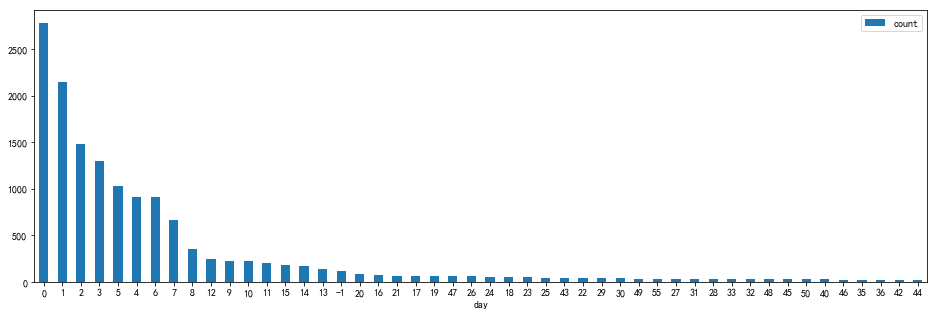

In [43]:
data = clear_type(df_mx1,'认购日期',str)
data1 = data[['认购日期','签约日期']]
data1['count'] = pd.to_datetime(data1['签约日期']) - pd.to_datetime(data1['认购日期'])
data1 ['day'] = data1['count'].dt.days
data1['day']= data1['day'].fillna(0).astype(int)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
d = data1[['day','count']].groupby('day').count()
d[d['count'] > 20].sort_values('count',ascending=False).plot.bar(rot=0,figsize=(16,5))

In [41]:

l  =[]
data = get_interval_data(df_mxlp,'签约日期',pd.to_datetime("2018-12-30"),pd.to_datetime("2018-12-1"))
data = data[['签约日期','分期名称']]
data['day'] = data['签约日期'].dt.day
data.groupby('分期名称').agg({"day":{"套数":"count","日期":"mean"}})
for name in list(data['分期名称'].unique()):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    data2 = data[data['分期名称'] == name][['day','签约日期']]
    if len(data2['签约日期'])>20:
        data2  = data2.groupby('day').count()
        data2.columns = [name]
        l.append(data2)
#         data2.plot.bar(title=name)

NameError: name 'df_mxlp' is not defined

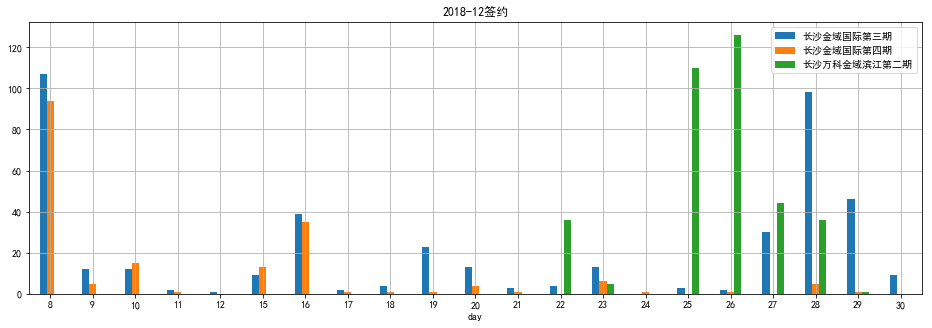

In [10]:
pd.concat(l,axis=1).fillna(0).plot.bar(rot=0,title="2018-12签约",figsize=(16,5),grid=True)

In [ ]:
data_bj2

In [ ]:
wq_loan_m(df_mx,today,is_agg=False)

In [ ]:
df_lp.columns

In [ ]:
fields = ['项目名称', '楼盘_合并房号','客户名称', '建筑预测面积', '建筑实测面积','预计交房日期','业务员',  '成交总价', '按揭银行']
df_lp[fields][df_lp['楼盘_合并房号'] == "13-502"]

In [ ]:
patt = r"^S?\d+-S?\d+$"

In [ ]:

# 房间ID 匹配
roomcod_patt = r"(^P\d{4}-\d{2}-[A-Z]\d{4}-\w{1,4}--?\d{1,3}-.{1,15}\d$)"
com_roomcode = re.compile(roomcod_patt)
com_roomcode.match("P5109-01-B0028-2-9-1-1001")


In [ ]:
# 姓名匹配
patt = r"[\u4E00-\u9FA5]{2,4}"
com_name = re.compile(patt)
com_name.match("马敏伟")
df_lp_r[df_lp_r['客户名称'].astype(str).str.contains("马敏伟")]

In [ ]:
mx_l = ['房间编码','项目','类型', '签约日期','网签日期','买卖合同总价', '付款方式', '贷款金额', '首付金额', '贷款银行','备案异常情况']
lp_l = ['房间编码','项目名称','客户名称','认购日期','转签约日期','销售状态','产品类型全称','成交总价','营销楼栋名称','房号','实收款合计','欠款金额(不含面积补差）']
df_lp_r = df_lp[lp_l]
df_mx_r = df_mx[mx_l]
df_mxlp = pd.merge(df_lp_r,df_mx_r,how='right',on="房间编码")
df_mxlp.dropna(subset=["房间编码"],inplace=True)

In [ ]:
patt = r"^S?\d+-S?\d+$"
# 房间ID 匹配
roomcod_patt = r"(^P\d{4}-\d{2}-[A-Z]\d{4}-\w{1,4}--?\d{1,3}-.{1,15}\d$)"
com_roomcode = re.compile(roomcod_patt)
com_roomcode.match("P5109-01-B0028-2-9-1-1001")
# 姓名匹配
patt = r"[\u4E00-\u9FA5]{2,4}"
com_name = re.compile(patt)
com_name.match("马敏伟")
df_lp_r[df_lp_r['客户名称'].astype(str).str.contains("马敏伟")]

In [ ]:
n= 0
l = []
for name in list(y):
    if com_name.match(name):
        n = n + 1
    else:
        l.append(name)
print(n)

In [ ]:
l

In [ ]:
len(y)

In [ ]:
df_lp['房间编码'].str[0:5].unique()

In [ ]:
df_lp['房间编码'].str[6:8].unique()

In [ ]:
df_name = df_lp['客户名称'].str.split(r'[、,/\.，\\　 ]',expand=True)

In [ ]:
s_all = set({})
for i in range(4):
    s_all = s_all | set(df_name[i].unique())

In [ ]:
len(s_all)

In [ ]:
"""
权证喜欢看的数据形式
"""

In [ ]:
df_mx[['项目','类型','姓名','买卖合同总价','首付金额','贷款金额','付款方式','签约日期','合并房号','银行备案资料']] \
    [
    (df_mx['付款方式'] != "一次性分期") & 
     (df_mx['付款方式'] != "一次性") & (df_mx['类型'] != "车位")
     & (df_mx['银行备案资料'].isnull())
     & (df_mx['签约日期']>d)
    
    ].reset_index(drop=True)

In [ ]:
df_lp_rg[df_lp_rg['项目']=="缇香"]